# Customer Segmentation on using Python

## Behavioral Segmentation 

In [1]:
#Import all necessary libraries: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [35]:
# Read the dataset into a pandas data frame for accessing 

data = pd.read_excel("Global_Superstore.xls")

# Display the first 5 rows of dataset
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [36]:
#display the last 5 rows of dataset
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium
51289,6147,MX-2012-134460,2012-05-22,2012-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.002,High


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null datetime64[ns]
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null fl

In [38]:
data.Country.value_counts()

United States               9994
Australia                   2837
France                      2827
Mexico                      2644
Germany                     2065
China                       1880
United Kingdom              1633
Brazil                      1599
India                       1555
Indonesia                   1390
Turkey                      1378
Italy                       1108
Nigeria                      905
Spain                        859
Dominican Republic           742
El Salvador                  736
Cuba                         724
Honduras                     713
Philippines                  681
New Zealand                  628
Nicaragua                    614
Iran                         607
Guatemala                    521
Egypt                        487
South Africa                 461
Morocco                      451
Netherlands                  435
Argentina                    390
Panama                       388
Iraq                         388
          

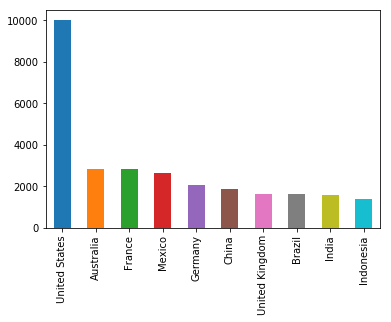

In [39]:
data.Country.value_counts()[:10].plot(kind='bar')

In [40]:
data = data[(data.Segment == 'Consumer') & (data.Country == 'United States')]
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
9,40936,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical
21,31784,CA-2011-154627,2011-10-29,2011-10-31,First Class,SA-20830,Sue Ann Reed,Consumer,Chicago,Illinois,...,TEC-PH-10001363,Technology,Phones,Apple iPhone 5S,2735.952,6,0.2,341.9940,752.51,High
32,32735,CA-2012-139731,2012-10-15,2012-10-15,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,...,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.430,5,0.3,-350.4900,690.42,High
34,32543,CA-2011-168494,2011-12-12,2011-12-14,Second Class,NP-18700,Nora Preis,Consumer,Fresno,California,...,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,3610.848,12,0.2,135.4068,683.12,High


In [41]:
# CREATE RFM FEATURES FOR EACH CUSTOMERS: 

data_RFM = data.groupby('Customer ID').agg({'Order Date': lambda y: (data['Order Date'].max().date() - y.max().date()).days,'Order ID': lambda y: len(y.unique()),'Sales': lambda y: round(y.sum(),2)})

In [42]:
print(data_RFM)

                Sales  Order ID  Order Date
Customer ID                                
AA-10315      5563.56         5         184
AA-10375      1056.39         9          19
AA-10480      1790.51         4         259
AA-10645      5086.93         6          55
AB-10015       886.16         3         415
AB-10105     14473.57        10          41
AB-10150       966.71         5          41
AB-10165      1113.84         8          25
AC-10450      5527.85         7          11
AC-10660       657.32         5         282
AF-10870      2052.91         7          41
AF-10885       861.56         4         415
AG-10270      2582.90         5         278
AG-10330       660.97         5           8
AG-10390       200.95         5         114
AG-10675      3489.04         7          97
AG-10900      4510.80        10          96
AH-10210      4805.34         9           6
AH-10465      2495.39         5         230
AH-10585       738.50         4          21
AI-10855      4375.79        10 

In [43]:
data_RFM.columns = ["MONETARY","FREQUENCY",'RECENCY',  ]

In [44]:
data_RFM.head()

,MONETARY,FREQUENCY,RECENCY
Customer ID,,,
AA-10315,5563.56,5,184
AA-10375,1056.39,9,19
AA-10480,1790.51,4,259
AA-10645,5086.93,6,55
AB-10015,886.16,3,415


In [45]:
data_RFM = data_RFM.sort_values('MONETARY',ascending = False)
data_RFM.head()

,MONETARY,FREQUENCY,RECENCY
Customer ID,,,
RB-19360,15117.34,6,96
AB-10105,14473.57,10,41
KL-16645,14175.23,12,47
SC-20095,14142.33,9,349
HL-15040,12873.30,6,43


In [46]:
# For segmentation, 80%  quantile is used for Recency and Monetary

Quantile = data_RFM.quantile(q = [0.8])

In [47]:
Quantile

,MONETARY,FREQUENCY,RECENCY
0.8,4070.17,8.0,222.2


In [48]:
data_RFM['R'] = np.where(data_RFM['RECENCY']<= int(Quantile.RECENCY.values),2,1)
data_RFM['F'] = np.where(data_RFM['FREQUENCY']>= int(Quantile.FREQUENCY.values),2,1)
data_RFM['M'] = np.where(data_RFM['MONETARY']>=int(Quantile.MONETARY.values),2,1)
data_RFM.head()

,MONETARY,FREQUENCY,RECENCY,R,F,M
Customer ID,,,,,,
RB-19360,15117.34,6,96,2,1,2
AB-10105,14473.57,10,41,2,2,2
KL-16645,14175.23,12,47,2,2,2
SC-20095,14142.33,9,349,1,2,2
HL-15040,12873.30,6,43,2,1,2


In [49]:
# Calculate RFM Score and SORT the customers
# Only using R and M values to create the 2 X 2 Matrix 

data_RFM['RM_Score'] = data_RFM.M.map(str)+data_RFM.R.map(str)
data_RFM.head()

,MONETARY,FREQUENCY,RECENCY,R,F,M,RM_Score
Customer ID,,,,,,,
RB-19360,15117.34,6,96,2,1,2,22
AB-10105,14473.57,10,41,2,2,2,22
KL-16645,14175.23,12,47,2,2,2,22
SC-20095,14142.33,9,349,1,2,2,21
HL-15040,12873.30,6,43,2,1,2,22


In [50]:
data_RFM = data_RFM.reset_index()
data_RFM_SUM = data_RFM.groupby('RM_Score').agg({'Customer ID': lambda y: len(y.unique()),'FREQUENCY': lambda y: round(y.mean(),0),'RECENCY': lambda y: round(y.mean(),0),'R': lambda y: round(y.mean(),0),
'M': lambda y: round(y.mean(),0),
'MONETARY': lambda y: round(y.mean(),0)})

In [53]:
data_RFM.head()

,Customer ID,MONETARY,FREQUENCY,RECENCY,R,F,M,RM_Score
0,RB-19360,15117.34,6,96,2,1,2,22
1,AB-10105,14473.57,10,41,2,2,2,22
2,KL-16645,14175.23,12,47,2,2,2,22
3,SC-20095,14142.33,9,349,1,2,2,21
4,HL-15040,12873.30,6,43,2,1,2,22


In [52]:
data_RFM_SUM.head()

,MONETARY,Customer ID,R,FREQUENCY,RECENCY,M
RM_Score,,,,,,
11,1526.0,73,1,4,440,1
12,1902.0,254,2,6,70,1
21,8564.0,9,1,7,425,2
22,6711.0,73,2,8,59,2


In [54]:
data_RFM_SUM = data_RFM_SUM.sort_values('RM_Score', ascending = False)
data_RFM_SUM.head()

,MONETARY,Customer ID,R,FREQUENCY,RECENCY,M
RM_Score,,,,,,
22,6711.0,73,2,8,59,2
21,8564.0,9,1,7,425,2
12,1902.0,254,2,6,70,1
11,1526.0,73,1,4,440,1


In [57]:
# 1) Average Monetary Matrix
data_RFM_M = data_RFM_SUM.pivot(index='M', columns='R', values='MONETARY')
data_RFM_M= data_RFM_M.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
print(data_RFM_M)

R       1       2
M                
2  8564.0  6711.0
1  1526.0  1902.0


In [58]:
# 2) Number of Customer Matrix
data_RFM_C = data_RFM_SUM.pivot(index='M', columns='R', values='Customer ID')
data_RFM_C= data_RFM_C.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
print(data_RFM_C)

R   1    2
M         
2   9   73
1  73  254


In [59]:
# 3) Compute nRecency Matrix
data_RFM_R = data_RFM_SUM.pivot(index='M', columns='R', values='RECENCY')
data_RFM_R= data_RFM_R.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
print(data_RFM_R)

R    1   2
M         
2  425  59
1  440  70
